# Bootstrapping standard errors in a linear fit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = np.array([16, 9]) * 0.8
size = 50
m_true = 2
b_true = 1
noise_std = 0.5
x = np.linspace(0, 1, size)
y = np.random.normal(0, noise_std, size=size) + b_true + x*m_true

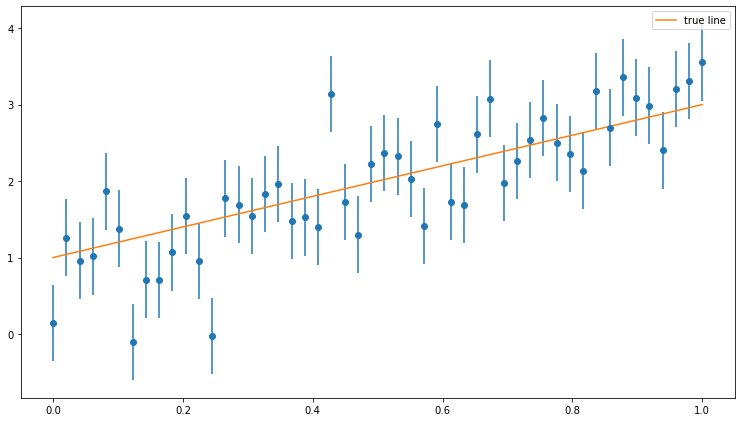

In [2]:
plt.errorbar(x, y, yerr=noise_std, ls='', marker='o')
plt.plot(x, b_true + x*m_true, label='true line')
plt.legend()

# Best fit line

In [3]:
m_best, b_best = np.polyfit(x, y, 1)
print("m: %1.2f\nb: %1.2f" % (m_best, b_best))

m: 2.50
b: 0.70


# Bootstrap

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame({'x': x, 'y':y})

In [6]:
N_bootstrap = 1000
ms = np.zeros(N_bootstrap)
bs = np.zeros(N_bootstrap)

for j in range(N_bootstrap):
    df_resampled = df.sample(frac=1, replace=True)
    ms[j], bs[j] = np.polyfit(df_resampled.x.values, df_resampled.y.values, 1)

In [7]:
fits = pd.DataFrame({"m_fit": ms, "b_fit": bs})

array([[<AxesSubplot:xlabel='m_fit', ylabel='m_fit'>,
        <AxesSubplot:xlabel='b_fit', ylabel='m_fit'>],
       [<AxesSubplot:xlabel='m_fit', ylabel='b_fit'>,
        <AxesSubplot:xlabel='b_fit', ylabel='b_fit'>]], dtype=object)

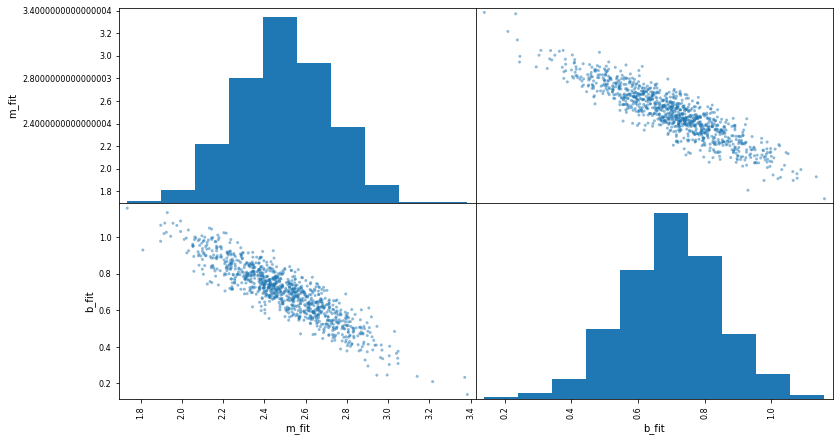

In [8]:
pd.plotting.scatter_matrix(fits)

In [9]:
stats = fits.describe()

In [10]:
stats

,m_fit,b_fit
count,1000.000000,1000.000000
mean,2.493756,0.701231
std,0.225193,0.150209
min,1.734890,0.139435
25%,2.346926,0.602048
50%,2.486615,0.709104
75%,2.651973,0.797446
max,3.383693,1.159737


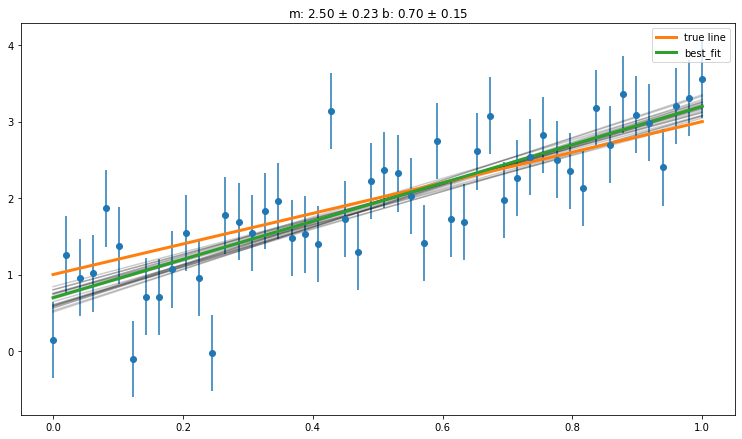

In [11]:
for j in range(20):
    plt.plot(x, 
             fits.m_fit.values[j]*x + fits.b_fit.values[j], alpha=0.2, color='black')

plt.errorbar(x, y, yerr=noise_std, ls='', marker='o')
plt.plot(x, b_true + x*m_true, label='true line', lw=3)
plt.plot(x, b_best + m_best * x, color='C2', label="best_fit", lw=3)
plt.title("m: %1.2f $\\pm$ %1.2f b: %1.2f $\\pm$ %1.2f" % (m_best, stats.m_fit['std'], b_best, stats.b_fit['std']))
plt.legend()


# Comparing against scipy stats

In [12]:
from scipy import stats
res = stats.linregress(x, y)

In [13]:
slope = res.slope
intercept = res.intercept
rsq = res.rvalue**2
pvalue = res.pvalue
stderr_slope = res.stderr
stderr_intercept = res.intercept_stderr

In [14]:
print("Scipy stats output:\nslope: %1.2f +/- %1.2f\n%1.2f +/- %1.2f\nr^2:%1.2e2\np-value:%1.2e" % (slope, stderr_slope, intercept, stderr_intercept, rsq, pvalue) )

Scipy stats output:
slope: 2.50 +/- 0.24
0.70 +/- 0.14
r:6.89e-012
p-value:8.93e-14
